## EE 461P: Data Science Principles  
### Assignment 2 
### Total points: 60
### Due: Thursday, Feb 25, 2021, submitted via Canvas by 11:59 pm  

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UT eID for both students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group. If you do change, let the TAs know.

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

### Name(s) and EID(s):
1. 
2. 

### Homework group No.: 

# Question 1 - Cross Validation (15 pts)

Use the given code below to load the dataset from "data.csv". The dataset contains eight attributes (or features, denoted by X1...X8) and two responses (or outcomes, denoted by y1 and y2). This dataset was created for energy analysis using 12 different building shapes.The buildings differ with respect to the glazing area, the glazing area distribution, and the orientation, amongst other parameters. By simulating various settings as functions of the afore-mentioned characteristics in total there are 768 building shapes. For more information on the dataset refer this [link](https://archive.ics.uci.edu/ml/datasets/Energy+efficiency). The aim is to use the eight features to predict one of the two responses.In this question, we will predict only the y1 response. 

Specifically:
* X1 - Relative Compactness
* X2 - Surface Area
* X3 - Wall Area
* X4 - Roof Area
* X5 - Overall Height
* X6 - Orientation
* X7 - Glazing Area
* X8 - Glazing Area Distribution
* y1 - Heating Load
* y2 - Cooling Load






In [21]:
import pandas as pd
import numpy as np 
import sklearn

data = pd.read_csv("data_qn1.csv",delimiter=",")
y = data["Y1"]
X = data.drop(columns=["Y1","Y2"])

In [22]:
X.shape

(768, 8)


We will be analyzing the following scenarios for the given dataset.

* Compare hold-out(80:20) train-test split cross validation and K-Fold Cross Validation 
* What happens when the number of folds increase for K-Fold Cross Validation? 
* Variance in the prediction for each case - Hold Out Validation and K-Fold Validation?



a) [**3 pts**] Split the original dataset(X,y) into 80:20 [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) split, use linear regression to fit the model on the training data and evaluate the model using the test data. Report the root mean squared error (RMSE) on the test data for five different runs, make sure to store the RMSE values, we will use these values later to plot in part (d).

b) [**3 pts**] Now, we will use [K-Fold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) validation from sklearn to split the original data(X,y) into 5 folds. For each fold use linear regression to fit the model on training data and evaluate the model on the test data. Compute the average RMSE of the 5 folds, repeat the same for five different random splits of K-Fold. You can refer to the following line of code to perform the split. Make sure to vary the random_state value for five different runs. Record the RMSE values we will use them later in part (d).

```
kf = KFold(n_splits=5,random_state=random_state,shuffle=True)
```

c) [**3 pts**] Repeat the same experiment as in part (b) by varying the number of folds as k = 1,5,100,768 and record the RMSE for each value of k.

d) [**3 pts**] Now, we will plot the box plot of the RMSE values obtained from part a), b) and c) together in a single figure. To reiterate, each part will have five values of RMSE. You can refer [here](https://matplotlib.org/stable/gallery/pyplots/boxplot_demo_pyplot.html#sphx-glr-gallery-pyplots-boxplot-demo-pyplot-py) on how to plot the boxplots. Boxplots are used to understand the variance in the values of the RMSE. For more information on box plots refer this [link](https://en.wikipedia.org/wiki/Box_plot).



In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

In [37]:
mse_1 = []
lr1 = LinearRegression()

for i in range(5):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
  
  lr1.fit(X_train,y_train)
  pred1 = lr1.predict(X_test)

  mse_1.append(mean_squared_error(y_true=y_test,y_pred=pred1)**0.5)
print(mse_1)

[3.375313970073886, 2.891315776305199, 3.184415980595557, 3.0052446782133586, 2.9055042726374674]


In [ ]:
from sklearn.model_selection import KFold
lr1 = LinearRegression()
mse = {}
k_values = [5,100,768]

for k in k_values:
  mse_k = []
  for i in range(5):
    err = []
    kf = KFold(n_splits=k,random_state=i,shuffle=True)
    for train_index, test_index in kf.split(X):
        #print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        #print(X_train.shape,X_test.shape)

        lr1.fit(X_train,y_train)
        pred1 = lr1.predict(X_test)
        error = (mean_squared_error(y_true=y_test,y_pred=pred1))**0.5
        err.append(error)
    res = sum(err)/len(err)
    mse_k.append(res)
  mse[k] = mse_k



In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1]) 
data = [mse_1,mse[5],mse[100],mse[768]]
ax.boxplot(data,labels=("Hold-Out-Validation","5-Fold","100-Fold","768-Fold"))
ax.set_ylabel("RMSE")
plt.show()


e) [**3 pts**] Using the boxplot answer the following questions,

1) What do you observe in the variation for RMSE of hold out validation and k-Fold validation, explain with reasoning which one will you choose to evaluate the model.

2) What happens when the number of folds increase to larger values?


We can see that the variation in RMSE decreases as number of folds increases, this is because as the folds increase the model evaluation is performed on multiple evaluation sets, which captures a resonable variability in the estimate of RMSE. As K increases, the time to evaluate increases, so it is better to choose a nominal value of folds based on size of the dataset. For holdout validation , we can see that the 80-20 split is randomized and multiple random sets indicates outlier values as well.

# Question 2 - Bias Variance TradeOff (10 pts)

a) [**5pts**] What is the difference between the notion of model bias (for example, a model that predicts age as a function of some other features) and the bias of a point estimator (for example, the mean age of students estimated from a sample of age values)?

b) [**5pts**] a) Assume you have a model trained to solve a problem. How do you expect (i) the bias and (ii) the variance to change if you used a larger training dataset, but no other process changed?

# Answer 2

a) Model bias is the extent to which the model matches the training set. If a model has high bias, it will not fit with the dataset well. The bias of a point estimator is the difference between the expected value of the estimator and the actual value for a given sample.

b) The bias would stay the same since the average predic, but the variance would decrease due to less overfitting. To change the bias, you would need a different model.

# Question 3: Ridge and Lasso Regression (15 points)

In this question you will explore the application of Lasso and Ridge regression using sklearn package in Python. Use the following code to load the train and test data.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings('ignore')

df = pd.read_csv("data_qn3.csv", index_col=0)
print(df.shape)
df = df.loc[df['Year']==2014, :]
df = df.drop('Year', axis=1)
df = pd.get_dummies(df, columns=['Status'])
df = df.dropna()
print(df.shape)

# Creating training and testing dataset
y = df.iloc[:, 0]
X = df.iloc[:, 1:]
scaler = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 42)


(2938, 21)
(131, 21)


## Question 3.1 (3 points) 
Run Linear regression on the train dataset and print the $R^2$ value using the test dataset.

## Question 3.2 (6 points) 
Run linear regression using Lasso and determine the value of $\alpha$ that results in best test set performance. Consider `alphas=10**np.linspace(1,-2,100)*0.5`. Display the best value of $\alpha$ as well as the corresponsing $R^2$ score on test set. Use the following parameters in Lasso model. Finally, store the best model separately. Also, use the co-efficients obtained and select the [columns with non-zero weights](https://stackoverflow.com/questions/62323713/selecting-columns-of-dataframe-where-lasso-coefficient-is-nonzero) and use them to create `X_train_lasso` and `X_test_lasso`. Show how many non-zero columns are present. Plot the coefficients of the lasso model for different alpha values, you can use log scale to plot the alphas in the x_axis.

    copy_X=True
    normalize=True # Normalizes data using StandardScaler()
    random_state=42

## Question 3.3 (6 points) 
Run linear regression using Ridge and determine the value of $\alpha$ that results in best test set performance. Consider `alphas=10**np.linspace(1,-2,100)*0.5`. Display the best value of $\alpha$ as well as the corresponsing $R^2$ score on test set. Use the following parameters in Ridge model.Plot the coefficients of the ridge model for different alpha values, you can use log scale to plot the alphas in the x_axis.

    copy_X=True
    normalize=True # Normalizes data using StandardScaler()
    random_state=42



Linear regression

In [8]:
lr = LinearRegression().fit(X_train,y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

score = lr.score(X_test,y_test)
print(f'{score:0.3f}')



0.836


Lasso

In [9]:
from sklearn import linear_model

alphas=10**np.linspace(1,-2,100)*0.5
best_score = 0
best_alpha_lasso = 0
best_clf = None 

for alpha in alphas: 
    clf = linear_model.Lasso(alpha=alpha, copy_X=True, normalize=True, random_state=42)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    if score > best_score:
        best_score = score 
        best_alpha_lasso = alpha 
        best_clf = clf
print(f'{best_score:0.3f}', f'{best_alpha_lasso:0.3f}')

X_train_lasso = X_train.iloc[:, best_clf.coef_!=0]
X_test_lasso = X_test.iloc[:, best_clf.coef_!=0]
print(X_train.shape, X_test_lasso.shape)


0.852 0.014
(104, 20) (27, 11)


Best alpha ridge 

In [10]:
best_score = 0
best_alpha_ridge = 0

for alpha in alphas: 
    clf = linear_model.Ridge(alpha=alpha, copy_X=True, normalize=True, random_state=42)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    if score > best_score:
        best_score = score 
        best_alpha_ridge = alpha 
print(f'{best_score:0.3f}', f'{best_alpha_ridge:0.3f}')

0.834 0.005


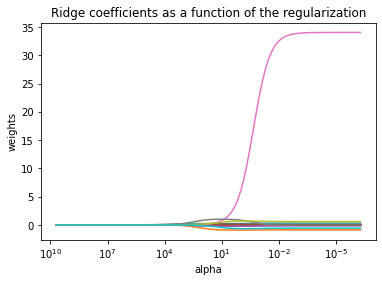

In [11]:
alphas = 10**np.linspace(10,-6,100)*0.5 

ridge = linear_model.Ridge(alpha=alpha)
coefs = []

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization');

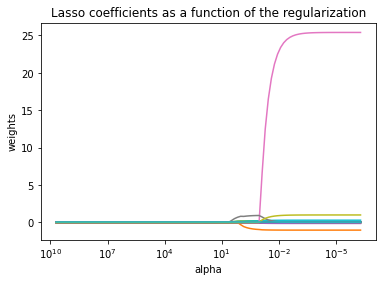

In [12]:
alphas = 10**np.linspace(10,-6,100)*0.5  #start at 10 stop at -2 give 100 numbers

lasso = linear_model.Lasso(alpha=alpha,tol=.1)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a,tol=.1)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization');

# Question 4: Polynomial Feature Transformation (20 points) 
Often, you will find that transforming features into higher degrees will yield better models. In this question, we will see how to do non-linear regression using a linear model by using polynomial feature transformation. You will need to build only one plot for this entire question. So, plot everything on the same plot. Let us now consider the following dataset:



In [13]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

np.random.seed(2)

def h(x):
    """ function to approximate by polynomial interpolation"""
    return np.sin(x) + np.log(x) 


# generate points used to plot
x_plot = np.linspace(2, 12, 100)

# generate points and keep a subset of them
x = np.linspace(2, 12, 100)

rng = np.random.RandomState(20)
rng.shuffle(x)

x_train = np.sort(x[:50])
x_test = np.sort(x[50:80])



# create matrix versions of these arrays
x_train = x_train[:, np.newaxis]
x_test = x_test[:,np.newaxis]
x_plot = x_plot[:, np.newaxis]

y_train = h(x_train) + np.random.normal(0, 0.5, size=x_train.shape) 
y_test = h(x_test)+ np.random.normal(0, 0.5, size=x_test.shape) 



1. Build a scatter plot with `s=30` and `marker='o'` using x_train and y_train. Also, build a line plot using `x_plot` and `h(x_plot)` to show the trend. (5 pts)
2. Transform `x_train` and `x_test` using [PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) with degrees 1,3,5,7,9,11 and save these transformed datasets. For example, if an input sample is two dimensional and of the form [$a$, $b$], the degree-2 polynomial features are [$1$, $a$, $b$, $a^2$, $ab$, $b^2$]. (5 pts)
3. Use ridge regression with default parameters on each of these train datasets. Now, calculate the predicted target values for the fitted model using `.predict(X_plot)` and show line plots using `x_plot` and the predicted target values. Also, calculate the training MSE and test MSE for each of them using the model. (5 pts)
4. Report your observations from the plot w.r.t how the evaluation metrics change on increasing the `degree` parameter. What do you think will happen if we keep on increasing the value of `degree`? (5 pts)

In [14]:
x_train.shape, x_plot.shape 

((50, 1), (100, 1))

Degree = 1, Train MSE = 0.66
Degree = 1, Test MSE = 0.80
Degree = 3, Train MSE = 0.38
Degree = 3, Test MSE = 0.53
Degree = 5, Train MSE = 0.27
Degree = 5, Test MSE = 0.38
Degree = 7, Train MSE = 0.26
Degree = 7, Test MSE = 0.34
Degree = 9, Train MSE = 0.25
Degree = 9, Test MSE = 0.27
Degree = 11, Train MSE = 0.25
Degree = 11, Test MSE = 0.30


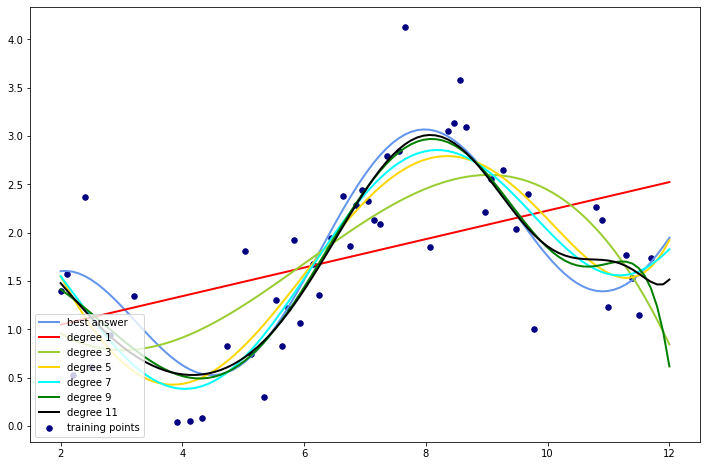

In [15]:
from sklearn.metrics import mean_squared_error, r2_score
colors = ['red', 'yellowgreen', 'gold','cyan','green','black','brown']
lw = 2
plt.figure(figsize=(12,8))

plt.plot(x_plot, h(x_plot), color='cornflowerblue', linewidth=lw,
         label="best answer")
plt.scatter(x_train, y_train, color='navy', s=30, marker='o', label="training points")
train_mse = []
test_mse = []

for count, degree in enumerate([1,3,5,7,9,11]):
    model = make_pipeline(PolynomialFeatures(degree), Ridge())
    model.fit(x_train, y_train)
    y_plot = model.predict(x_plot)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    train_mse.append(mean_squared_error(y_train, y_pred_train))
    test_mse.append(mean_squared_error(y_test, y_pred_test))
    print(f'Degree = {degree}, Train MSE = {mean_squared_error(y_train, y_pred_train):.2f}')
    print(f'Degree = {degree}, Test MSE = {mean_squared_error(y_test, y_pred_test):.2f}')

    plt.plot(x_plot, y_plot, color=colors[count], linewidth=lw,
             label="degree %d" % degree)

plt.legend(loc='lower left')

plt.show()


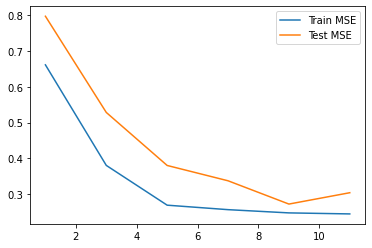

In [16]:
plt.plot([1,3,5,7,9,11],train_mse,label="Train MSE")
plt.plot([1,3,5,7,9,11],test_mse,label = "Test MSE")
plt.legend()

As the degree of polynomials increases , we can see that the test MSE decreases upto a certain degree after which the test MSE increases indicating overfitting